In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
line_mics_df = pd.read_excel("WhiteNoise_4mic_5cm_96kHz.xlsx", header=0, usecols="A:D")
line_mics_raw = line_mics_df.to_numpy()
line_signal_1 = line_mics_raw[:, 0]
line_signal_2 = line_mics_raw[:, 1]
line_signal_3 = line_mics_raw[:, 2]
line_signal_4 = line_mics_raw[:, 3]
fs = 96000  # Sampling frequency
mic_dist = 5e-2  # Distance between microphones in meters


In [72]:
angles = [0 , 30, 60, 90, 120, 150, 180]
dN_all = []
for i in angles:
    dN = (mic_dist * np.cos(np.radians(i)) * fs) / (343)
    dN_all.append(round(dN))

dN_all = abs(np.array(dN_all))

In [76]:
# 0 deg
angle_0 = np.array([line_signal_1[0:-3*dN_all[0]], line_signal_2[dN_all[0]:-2*dN_all[0]], line_signal_3[2*dN_all[0]:-dN_all[0]], line_signal_4[3*dN_all[0]:]])
angle_0_sum = np.sum(angle_0, axis=0)

# 30 deg
angle_30 = np.array([line_signal_1[0:-3*dN_all[1]], line_signal_2[dN_all[1]:-2*dN_all[1]], line_signal_3[2*dN_all[1]:-dN_all[1]], line_signal_4[3*dN_all[1]:]])
angle_30_sum = np.sum(angle_30, axis=0) 

# 60 deg
angle_60 = np.array([line_signal_1[0:-3*dN_all[2]], line_signal_2[dN_all[2]:-2*dN_all[2]], line_signal_3[2*dN_all[2]:-dN_all[2]], line_signal_4[3*dN_all[2]:]])
angle_60_sum = np.sum(angle_60, axis=0)

# 90 deg
angle_90 = np.array([line_signal_1, line_signal_2, line_signal_3, line_signal_4])
angle_90_sum = np.sum(angle_90, axis=0)

# 120 deg
angle_120 = np.array([line_signal_4[0:-3*dN_all[4]], line_signal_3[dN_all[4]:-2*dN_all[4]], line_signal_2[2*dN_all[4]:-dN_all[4]], line_signal_1[3*dN_all[4]:]])
angle_120_sum = np.sum(angle_120, axis=0)

# 150 deg
angle_150 = np.array([line_signal_4[0:-3*dN_all[5]], line_signal_3[dN_all[5]:-2*dN_all[5]], line_signal_2[2*dN_all[5]:-dN_all[5]], line_signal_1[3*dN_all[5]:]])
angle_150_sum = np.sum(angle_150, axis=0)

# 180 deg
angle_180 = np.array([line_signal_4[0:-3*dN_all[6]], line_signal_3[dN_all[6]:-2*dN_all[6]], line_signal_2[2*dN_all[6]:-dN_all[6]], line_signal_1[3*dN_all[6]:]])
angle_180_sum = np.sum(angle_180, axis=0)

In [89]:
prms_0 = np.sqrt(1/len(angle_0) * np.mean(angle_0_sum**2))
prms_30 = np.sqrt(1/len(angle_30) * np.mean(angle_30_sum**2))
prms_60 = np.sqrt(1/len(angle_60) * np.mean(angle_60_sum**2))
prms_90 = np.sqrt(1/len(angle_90) * np.mean(angle_90_sum**2))
prms_120 = np.sqrt(1/len(angle_120) * np.mean(angle_120_sum**2))
prms_150 = np.sqrt(1/len(angle_150) * np.mean(angle_150_sum**2))
prms_180 = np.sqrt(1/len(angle_180) * np.mean(angle_180_sum**2))

max_prms = max(prms_0, prms_30, prms_60, prms_90, prms_120, prms_150, prms_180)
max_angle = np.deg2rad(angles[[prms_0, prms_30, prms_60, prms_90, prms_120, prms_150, prms_180].index(max_prms)])

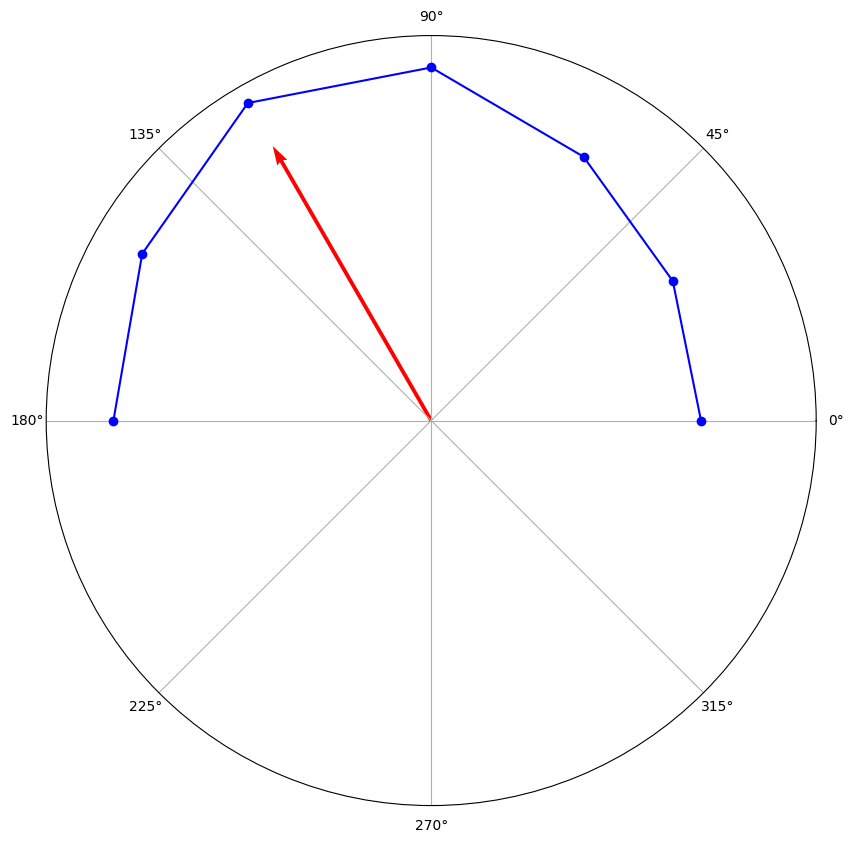

In [104]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = dict(polar=True))
ax.set_rmax(5)
ax.set_rticks([1, 2, 3, 4, 5])
ax.set_rlabel_position(180)
ax.grid(True)
angles_rad = np.deg2rad(angles)
prms_values = [prms_0, prms_30, prms_60, prms_90, prms_120, prms_150, prms_180]
ax.plot(angles_rad, prms_values, marker='o', color='b', linestyle='-')


ax.quiver(
    max_angle, 0,          # start point (theta, r)
    0, max_prms-0.01,  # vector (dtheta, dr)
    angles='xy',       # interpret dtheta/dr as delta in axes
    scale_units='xy',
    scale=1,           # no scaling
    color='red',
    width=0.005        # arrow thickness
)
plt.show()
